<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Take-Home File 1<br>(Week 1 - Day 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### Import the required libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

#### Read the data

Load the csv file and set the first column as index

In [62]:
df=pd.read_csv("/content/car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

#<b> EDA STEPS (OPTIONAL)

In [4]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

#<i>1 ENCODING

In [5]:
# Categorical Variables:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Fuel_Type"] = label_encoder.fit_transform(df["Fuel_Type"])
df["Seller_Type"] = label_encoder.fit_transform(df["Seller_Type"])
df["Transmission"] = label_encoder.fit_transform(df["Transmission"])
df["Car_Name"] = label_encoder.fit_transform(df["Car_Name"])
# year encoding is optional

In [6]:
# Handle Missing Data:

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<b>HANDLING OUTLIERS

#<i>2. SCALING

In [20]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.258416,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.017481,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.510154,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.356950,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.012079,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501


#<i>3 OUTLIER HANDLING

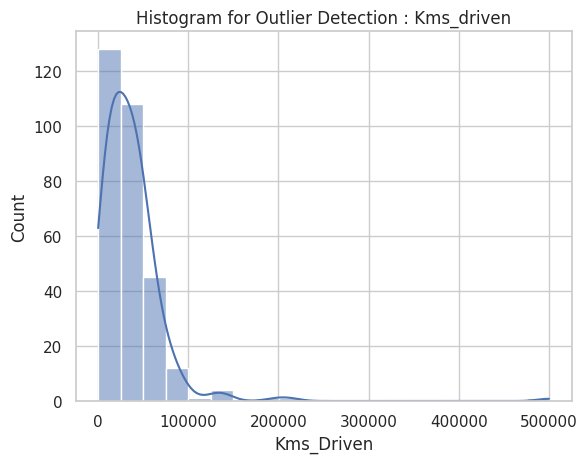

In [22]:
sns.histplot(df["Kms_Driven"], bins=20, kde=True)
plt.title("Histogram for Outlier Detection : Kms_driven")
plt.show()

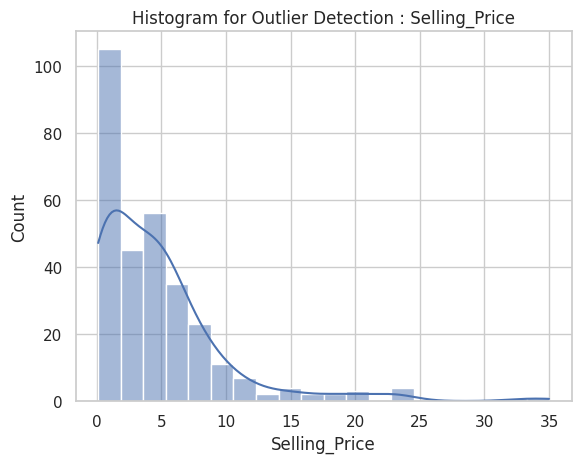

In [17]:
sns.histplot(df["Selling_Price"], bins=20, kde=True)
plt.title("Histogram for Outlier Detection : Selling_Price")
plt.show()

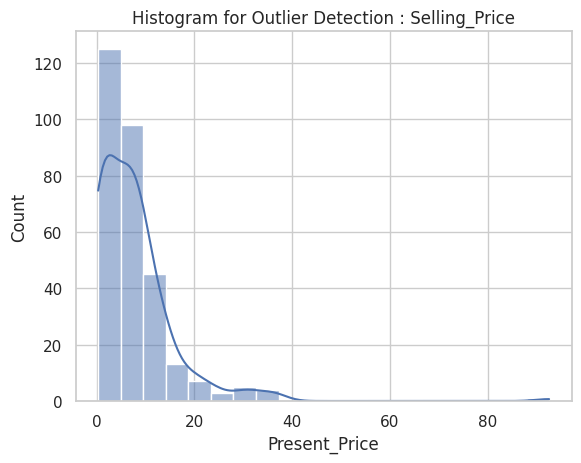

In [26]:
sns.histplot(df['Present_Price'], bins=20, kde=True)
plt.title("Histogram for Outlier Detection : Selling_Price")
plt.show()

Our objective is to predict the selling price of the cars data.

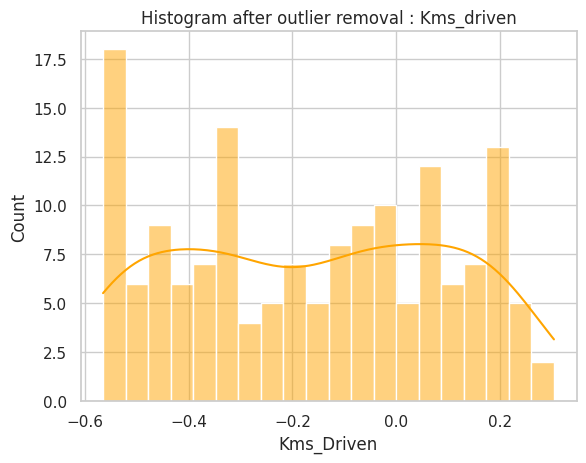

In [32]:
q1 = np.percentile(df_scaled["Kms_Driven"], 25)
q3 = np.percentile(df_scaled["Kms_Driven"], 75)
df_filtered = df_scaled[(df_scaled["Kms_Driven"] >= q1) & (df_scaled["Kms_Driven"] <= q3)]

sns.histplot(df_filtered["Kms_Driven"], bins=20, kde=True,color='orange')
plt.title("Histogram after outlier removal : Kms_driven")
plt.show()

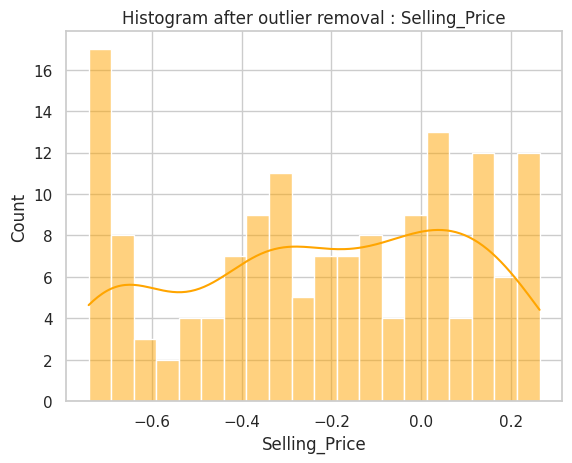

In [33]:
q1 = np.percentile(df_scaled["Selling_Price"], 25)
q3 = np.percentile(df_scaled["Selling_Price"], 75)
df_filtered = df_scaled[(df_scaled["Selling_Price"] >= q1) & (df_scaled["Selling_Price"] <= q3)]

sns.histplot(df_filtered["Selling_Price"], bins=20, kde=True,color='orange')
plt.title("Histogram after outlier removal : Selling_Price")
plt.show()

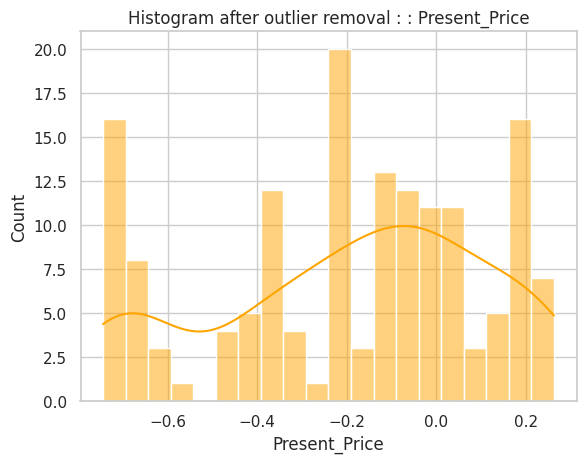

In [34]:
q1 = np.percentile(df_scaled["Present_Price"], 25)
q3 = np.percentile(df_scaled["Present_Price"], 75)
df_filtered = df_scaled[(df_scaled["Present_Price"] >= q1) & (df_scaled["Present_Price"] <= q3)]

sns.histplot(df_filtered["Present_Price"], bins=20, kde=True,color='orange')
plt.title("Histogram after outlier removal : : Present_Price")
plt.show()

#<b>INCLASS

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features

In [54]:
df=df_filtered

In [78]:

# HERE I TOOK target as Selling Price and Remaining as X

x=df_filtered.drop("Selling_Price",axis=1)
y=df_filtered['Selling_Price']
x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.30e-59
Time:                        10:21:25   Log-Likelihood:                 74.123
No. Observations:                 155   AIC:                            -130.2
Df Residuals:                     146   BIC:                            -102.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0415      0.025      1.636      0.104      -0.009       0.092
Car_Name         -0.0045      0.028     -0.158      0.875      -0.061       0.052
Year              0.1673      0.019      8.698      0.000       0.129       0.205
Present_Price     1.0592      0.070     15.099      0.000       0.921       1.198
Kms_Driven       -0.0609      0.035     -1.757      0.081      -0.129       0.008
Fuel_Type        -0.0180      0.014     -1.273      0.205      -0.046       0.010
Seller_Type      -0.0337      0.028     -1.191      0.236      -0.090       0.022
Transmission     -0.0288      0.019     -1.533      0.127      -0.066       0.008
Owner            -0.0094      0.017     -0.539      0.591      -0.044       0.025
==============================================================================
Omnibus:                       16.250   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.430
Skew:                           0.687   Prob(JB):                     6.04e-05
Kurtosis:                       4.058   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Getting parameter values
print("Beta Parameters:", ols_model.params)

Beta Parameters: const            0.041477
Car_Name        -0.004502
Year             0.167320
Present_Price    1.059210
Kms_Driven      -0.060865
Fuel_Type       -0.018030
Seller_Type     -0.033714
Transmission    -0.028754
Owner           -0.009398
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
#BUT HEATMAP DOES NOT TELL THE CORRELATION BETWEEN TWO VARIABLES
# TO CHECK MULTI COLLENIARITY YOU NEED TO FIND VIF VALUES
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

        Variable       VIF
0       Car_Name  3.217850
1           Year  2.232743
2  Selling_Price  1.863931
3     Kms_Driven  2.192765
4      Fuel_Type  1.344583
5    Seller_Type  3.567909
6   Transmission  1.203378
7          Owner  1.003346


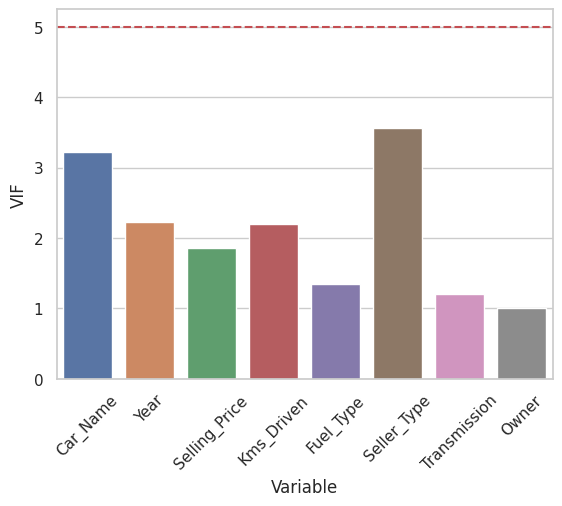

<Figure size 5000x1000 with 0 Axes>

In [39]:
sns.barplot(x=vif["Variable"],y=vif["VIF"])
plt.axhline(y=5, color='r', linestyle='--', label='Threshold')
plt.xticks(rotation=45)
plt.figure(figsize=(50, 10))

plt.show()

NO THERE IS NO VALUE FOR VIF > 5 hence NO

<Axes: >

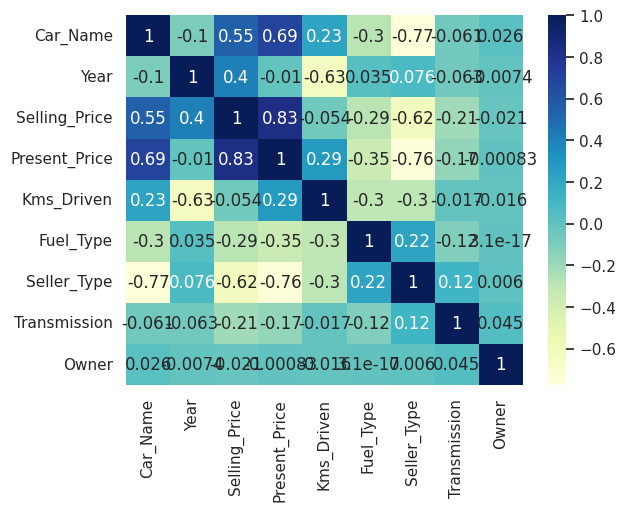

In [40]:
# method - USING correlation HEATMAP

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
df["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

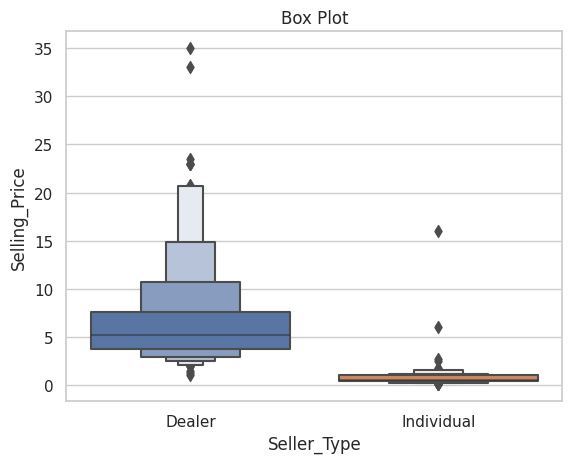

In [50]:
# SELLING PRICE is NUMERICAL
# SELLER type is categorical

sns.boxenplot(y=df["Selling_Price"], x=df["Seller_Type"])
plt.title('Box Plot')
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


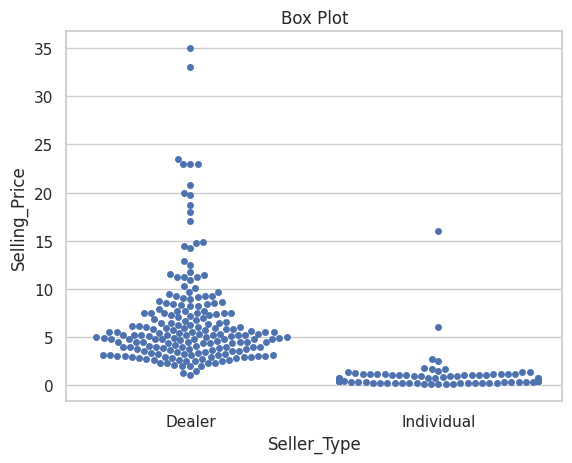

In [51]:
sns.swarmplot(y=df["Selling_Price"], x=df["Seller_Type"])
plt.title('Box Plot')
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [61]:
x=df[["Year","Present_Price","Kms_Driven"]]
y=df["Selling_Price"]

x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
ols_model.summary()




# ONLY  Kms_Driven has an effect on selling price

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     304.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           8.01e-64
Time:                        09:47:55   Log-Likelihood:                 71.464
No. Observations:                 155   AIC:                            -134.9
Df Residuals:                     151   BIC:                            -122.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0627      0.015      4.244      0.000       0.033       0.092
Year              0.1730      0.019      9.269      0.000       0.136       0.210
Present_Price     1.1456      0.044     25.813      0.000       1.058       1.233
Kms_Driven       -0.0435      0.033     -1.331      0.185      -0.108       0.021
==============================================================================
Omnibus:                        8.136   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.928
Skew:                           0.493   Prob(JB):                       0.0190
Kurtosis:                       3.506   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
x=df["Present_Price"]
y=df["Year"]

x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
ols_model.summary()



# PRESENT PRICE is having significant impact on Year

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Year   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6785
Date:                Sun, 26 Nov 2023   Prob (F-statistic):              0.411
Time:                        09:51:22   Log-Likelihood:                -745.86
No. Observations:                 301   AIC:                             1496.
Df Residuals:                     299   BIC:                             1503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2013.7493      0.223   9047.790      0.000    2013.311    2014.187
Present_Price    -0.0159      0.019     -0.824      0.411      -0.054       0.022
==============================================================================
Omnibus:                       64.816   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.069
Skew:                          -1.243   Prob(JB):                     9.27e-24
Kurtosis:                       4.508   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Present_Price', ylabel='Year'>

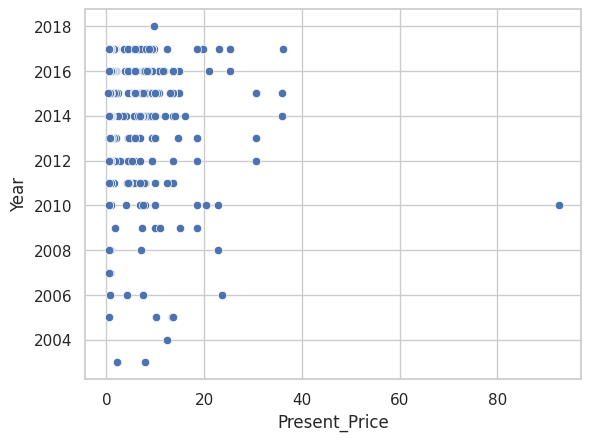

In [65]:
sns.scatterplot(y=df['Year'],x=df['Present_Price'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
x=df_filtered["Fuel_Type"]
y=df_filtered["Selling_Price"]

x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     14.30
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           0.000223
Time:                        09:58:29   Log-Likelihood:                -73.018
No. Observations:                 155   AIC:                             150.0
Df Residuals:                     153   BIC:                             156.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1304      0.031     -4.161      0.000      -0.192      -0.069
Fuel_Type     -0.1168      0.031     -3.781      0.000      -0.178      -0.056
==============================================================================
Omnibus:                        4.666   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.291
Skew:                           0.339   Prob(JB):                        0.117
Kurtosis:                       2.549   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

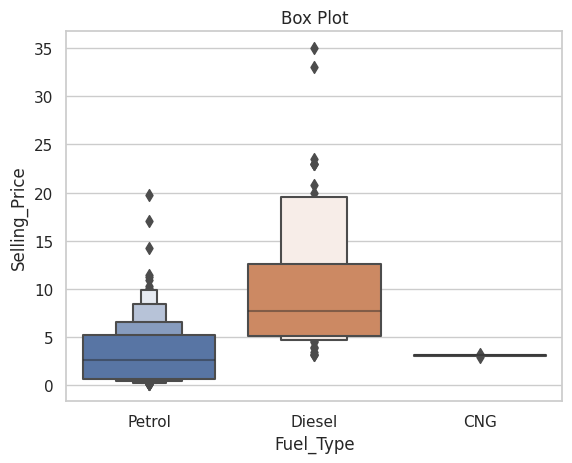

In [70]:
sns.boxenplot(y=df["Selling_Price"], x=df["Fuel_Type"])
plt.title('Box Plot')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [73]:
# Null Hypothesis (H0): The coefficient of the Transmission variable is zero (i.e., there is no significant relationship between Transmission and Selling_Price).

# Alternative Hypothesis (H1): The coefficient of the Transmission variable is not zero (there is a significant relationship).




x=df_filtered["Transmission"]
y=df_filtered["Selling_Price"]

x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
print(ols_model.summary())




# have the evidence to reject the null hypothesis and conclude that the model significantly explains variation in Selling_Price based on the transmission type.

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.889
Date:                Sun, 26 Nov 2023   Prob (F-statistic):            0.00955
Time:                        10:10:32   Log-Likelihood:                -76.527
No. Observations:                 155   AIC:                             157.1
Df Residuals:                     153   BIC:                             163.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1070      0.034     -3.180   

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# Null Hypothesis (H0):  there is no significant relationship between Present_price and Selling_Price.

# Alternative Hypothesis (H1): there is a significant relationship between Present_price and Selling_Price.


x=df_filtered["Present_Price"]
y=df_filtered["Selling_Price"]

x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
print(ols_model.summary())



# summary : Failed to reject NULL hypothesis  : there is no significant relationship between Present_price and Selling_Price


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     333.8
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.73e-40
Time:                        10:13:03   Log-Likelihood:                 9.7591
No. Observations:                 155   AIC:                            -15.52
Df Residuals:                     153   BIC:                            -9.431
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0790      0.022      3.632

In [76]:
# Extract the confidence intervals
confidence_intervals_95 = ols_model.conf_int(alpha=0.05)
confidence_intervals_99 = ols_model.conf_int(alpha=0.01)

print("95% Confidence Interval:", confidence_intervals_95.loc['Present_Price'].tolist())
print("99% Confidence Interval:", confidence_intervals_99.loc['Present_Price'].tolist())


95% Confidence Interval: [0.9976581978770199, 1.2395738218820271]
99% Confidence Interval: [0.9589170925610067, 1.2783149271980403]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price'

In [80]:
x=df_filtered.drop("Selling_Price",axis=1)
y=df_filtered['Selling_Price']
x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.30e-59
Time:                        10:22:23   Log-Likelihood:                 74.123
No. Observations:                 155   AIC:                            -130.2
Df Residuals:                     146   BIC:                            -102.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0415      0.025      1.636      0.104      -0.009       0.092
Car_Name         -0.0045      0.028     -0.158      0.875      -0.061       0.052
Year              0.1673      0.019      8.698      0.000       0.129       0.205
Present_Price     1.0592      0.070     15.099      0.000       0.921       1.198
Kms_Driven       -0.0609      0.035     -1.757      0.081      -0.129       0.008
Fuel_Type        -0.0180      0.014     -1.273      0.205      -0.046       0.010
Seller_Type      -0.0337      0.028     -1.191      0.236      -0.090       0.022
Transmission     -0.0288      0.019     -1.533      0.127      -0.066       0.008
Owner            -0.0094      0.017     -0.539      0.591      -0.044       0.025
==============================================================================
Omnibus:                       16.250   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.430
Skew:                           0.687   Prob(JB):                     6.04e-05
Kurtosis:                       4.058   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
np.sum(df_filtered['Selling_Price'] - ols_model.predict())

# approx 0

-1.6431300764452317e-14

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner

1 . MODEL 1 : Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission

In [86]:
x=df_filtered[['Year','Present_Price',"Kms_Driven","Owner","Fuel_Type","Seller_Type","Transmission"]]
y=df_filtered['Selling_Price']
x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.65e-60
Time:                        10:26:39   Log-Likelihood:                 74.109
No. Observations:                 155   AIC:                            -132.2
Df Residuals:                     147   BIC:                            -107.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0400      0.023      1.709      0.090      -0.006       0.086
Year              0.1678      0.019      8.874      0.000       0.130       0.205
Present_Price     1.0566      0.068     15.552      0.000       0.922       1.191
Kms_Driven       -0.0600      0.034     -1.760      0.081      -0.127       0.007
Owner            -0.0095      0.017     -0.548      0.584      -0.044       0.025
Fuel_Type        -0.0177      0.014     -1.269      0.207      -0.045       0.010
Seller_Type      -0.0313      0.024     -1.320      0.189      -0.078       0.016
Transmission     -0.0289      0.019     -1.547      0.124      -0.066       0.008
==============================================================================
Omnibus:                       16.995   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.746
Skew:                           0.702   Prob(JB):                     3.13e-05
Kurtosis:                       4.115   Cond. No.                         6.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. MODEL -2 : Year + Present_Price + Kms_Driven + Owner

In [87]:
x=df_filtered[['Year','Present_Price',"Kms_Driven","Owner"]]
y=df_filtered['Selling_Price']
x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     227.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.26e-62
Time:                        10:27:42   Log-Likelihood:                 71.659
No. Observations:                 155   AIC:                            -133.3
Df Residuals:                     150   BIC:                            -118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0622      0.015      4.198      0.000       0.033       0.091
Year              0.1727      0.019      9.232      0.000       0.136       0.210
Present_Price     1.1459      0.044     25.765      0.000       1.058       1.234
Kms_Driven       -0.0440      0.033     -1.345      0.181      -0.109       0.021
Owner            -0.0107      0.017     -0.615      0.539      -0.045       0.024
==============================================================================
Omnibus:                        7.884   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.649
Skew:                           0.482   Prob(JB):                       0.0218
Kurtosis:                       3.504   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**FROM ADJUSTED R-squared values MODEL -1 SEEMS TO BETTER THAN MODEL: 2**